In [1]:
import numpy as np
import scipy.stats as stats
import scipy.spatial.distance as dist
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.stats import wasserstein_distance, ks_2samp, mannwhitneyu, entropy, levene, normaltest
from sklearn.manifold import MDS
import pandas as pd
import glob
import tqdm 
import  sys
sys.path.append("../src/")

### DATA

In [ ]:
# Find all CSV files starting with 'bnabs' (for diseased)
diseased_files = glob.glob("./cincinnati_repertoires/bnabs*.csv")
# Find all CSV files starting with 'healthy' (for healthy)
healthy_files = glob.glob("./cincinnati_repertoires/healthy*.csv")

# Load each CSV file into a DataFrame and store them in lists
dfs_diseased = [pd.read_csv(file) for file in diseased_files]
dfs_healthy = [pd.read_csv(file) for file in healthy_files]

# Merge the DataFrames for each group into a single DataFrame per category
df_diseased = pd.concat(dfs_diseased, ignore_index=True)
df_healthy = pd.concat(dfs_healthy, ignore_index=True)

# Verify that the DataFrames contain the expected columns
print("Diseased columns:", df_diseased.columns.tolist())
print("Healthy columns:", df_healthy.columns.tolist())

/tmp/ipykernel_1474080/3388409576.py:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/rodelc/.local/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


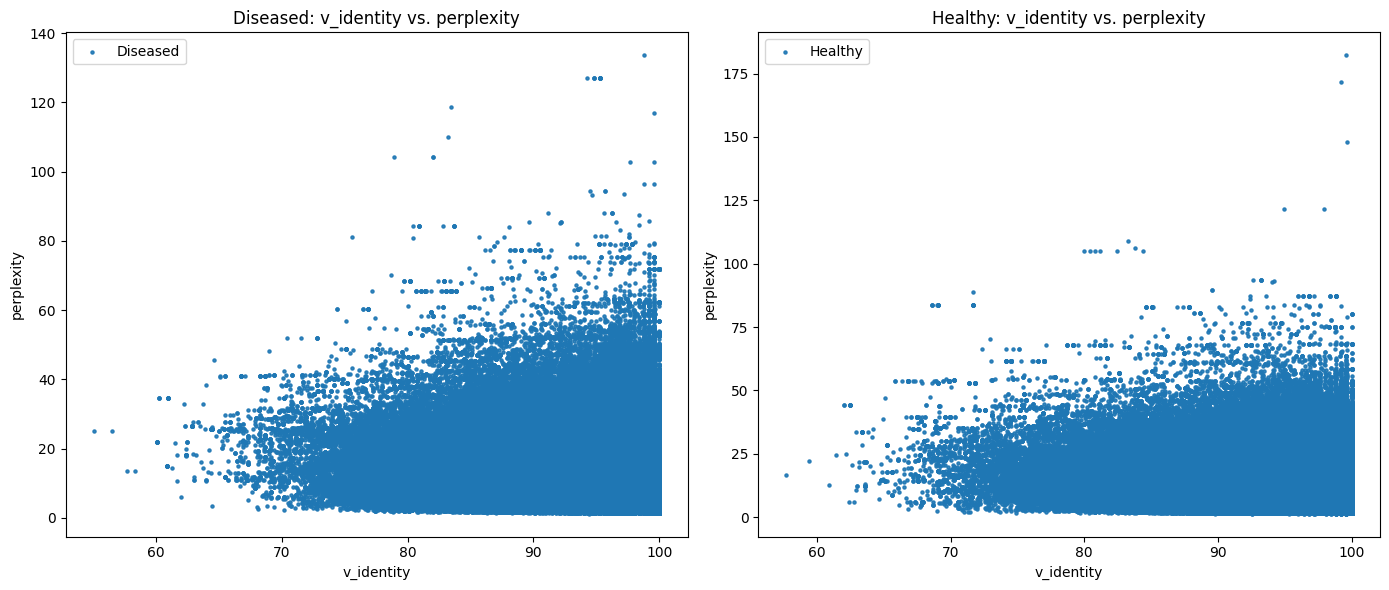

In [10]:
# Create two side-by-side scatter plots (one row, two columns)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for diseased patients
axs[0].scatter(df_diseased['v_identity'], df_diseased['perplexity'], label='Diseased', alpha=0.9, s=5)
axs[0].set_title('Diseased: v_identity vs. perplexity')
axs[0].set_xlabel('v_identity')
axs[0].set_ylabel('perplexity')
axs[0].legend()
axs[0].grid(False)  # Remove grid

# Scatter plot for healthy patients
axs[1].scatter(df_healthy['v_identity'], df_healthy['perplexity'], label='Healthy', alpha=0.9, s=5)
axs[1].set_title('Healthy: v_identity vs. perplexity')
axs[1].set_xlabel('v_identity')
axs[1].set_ylabel('perplexity')
axs[1].legend()
axs[1].grid(False)  # Remove grid

plt.tight_layout()
plt.show()
